## Comparison between correlated and uncorrelated variables using Monte Carlo

#### By Irene Virdis

### case 3: increasing number of samples

In this notebook will be investigated the Monte Carlo's results, in terms of mean and variance of output distribution, by varying the number of samples and the case of correlated input random variables will be compared.
The input Probability Density Functions are normal, with known values of mean $\mu$ and variance $\sigma^2$. In the section below have been reported the input parametes, together with the definition of a $\textit{blackbox}$ which receives the two random variables $X$, $Y$ and build the output random variable $z$ through a linear function.

In [4]:
from equadratures import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
#-------------------------- coefficients --------------------------#
a = 3.0
b = 5.0
#--------------------------- input distributions -----------------#

mu1 = -4.0 # mean 1
mu2 = 1.0 # mean 2

sigma1_quad = 1.5 # variance 1
sigma2_quad = 0.6 # variance 2

dev_1 = np.sqrt(sigma1_quad) # standard deviation 1
dev_2 = np.sqrt(sigma2_quad) # standard deviation 2

#---------------------------------------------------------------#
# 
def blackbox(x):
    return a*x[0] + b*x[1]


### Comparison between correlated and uncorrelated variables using Monte Carlo

We want to estimate numerically the expected value and the variance by assuming that $X$ and $Y$ are independent and not correlated; this can be specified usin the $\textit{Numpy}$ function $\textit{np.ramdom.randn}$.
In the following lines a $\textit{for}$ statement has been used to iteratively vary the number of samples used to extimate $\mu$ and $\sigma^2$.
Starting from the lower samples number (900000), this later will be increased of the $25\%$ in each iteration; as a consequence, in every cycle the input variables have to be reshaped together with the output distribution $Z$.
The results are two arrays which contain the mean and the variance associated with the different values of samples for each iteration.

In [6]:
#----------------------------- monte carlo mean and variance -----------#
#   INDEPENDENT VARIABLES

N = 900000          # initial number of samples
step = int(N*0.25)  # step used to iterate
end = int(step*10)  # final value of samples
l = int ((end - N)/step)

# input distributions
x = np.random.randn(N,2)
x1 = x[:,0]*dev_1 + mu1
x2 = x[:,1]*dev_2 + mu2

# array of samples
s = np.zeros((l,1))

for i in range(0,l):
    s[i]  = int(N + step*i)
#print s 

mean = np.zeros((l,1))
variance = np.zeros((l,1))

for i,value in enumerate(s):
    
    N = int(value)
    
    x = np.random.randn(N,2)
    x1 = x[:,0]*dev_1 + mu1
    x2 = x[:,1]*dev_2 + mu2
    z = evalfunction(np.reshape([x1,x2],(N,2)),blackbox)
    mean[i] = np.mean(z)
    variance[i] = np.var(z)
    
    print 'iteration:',i,'| samples number:',N, '| mean:', mean[i], '| variance', variance[i]    



iteration: 0 | samples number: 900000 | mean: [-11.99557735] | variance [435.76519374]
iteration: 1 | samples number: 1125000 | mean: [-11.99678464] | variance [435.88875795]
iteration: 2 | samples number: 1350000 | mean: [-12.00481135] | variance [435.68045528]
iteration: 3 | samples number: 1575000 | mean: [-11.99723096] | variance [435.60447534]
iteration: 4 | samples number: 1800000 | mean: [-11.99860135] | variance [435.30249238]
iteration: 5 | samples number: 2025000 | mean: [-12.00430043] | variance [435.87193124]


The results obtained show litte variation of $\mu$ and $\sigma^2$ with the increased values of samples number.

In the following section will be exposed the case in which the input variables are correlated: this relationship can be specify by using the $\textit{Numpy}$ function $\textit{np.random.multivariate}$ for a normal distribution; the procedure for iteratively varying the sample number is the same used for independent input $X$, $Y$.
The argument of the $\textit{multivariate}$ function are:

- mean array : for the case under study it has (2x1) dimension and contains $\mu_1$, $\mu_2$ the mean of each distributions $X$ and $Y$ respectively.

- covariance matrix: it is defined as follows: 
 $cov(X,Y) = 
  \left[ {\begin{array}{cc}
   {\sigma_1}^2 & {\sigma_1}{\sigma_2} \\
   {\sigma_2}{\sigma_1} & {\sigma_2}^2 \\
  \end{array} } \right]$
  
 is a matrix of (2x2) elements, positive and simmetric. Along the principal diagonal have  been reported the squared values of standard deviations ${\sigma_1}^2$ and ${\sigma_2}^2$: 


In [8]:
# mean array
mean_a = [mu1, mu2]
## matrix of covariance
cov  = [[sigma1_quad, sigma2_quad*sigma1_quad], [sigma1_quad*sigma2_quad , sigma2_quad]]

# init of mean and variance array
mean_c = np.zeros((l,1))
variance_c = np.zeros((l,1))

for i,value in enumerate(s):
    
    N = int(value)
    xc,yc = np.random.multivariate_normal(mean_a, cov,(N,1)).T
    zc = evalfunction(np.reshape([xc, yc],(N,2)),blackbox)
    mean_c[i] = np.mean(zc)
    variance_c[i] = np.var(zc)
    print 'iteration:',i,'| samples number:',N, '| mean:', mean_c[i], '| variance', variance_c[i]    


iteration: 0 | samples number: 900000 | mean: [-11.99656289] | variance [435.72887848]
iteration: 1 | samples number: 1125000 | mean: [-11.99243039] | variance [435.5937199]
iteration: 2 | samples number: 1350000 | mean: [-12.00717862] | variance [435.82345204]
iteration: 3 | samples number: 1575000 | mean: [-11.99529891] | variance [435.57915697]
iteration: 4 | samples number: 1800000 | mean: [-12.00421932] | variance [435.7545509]
iteration: 5 | samples number: 2025000 | mean: [-12.00479651] | variance [435.84311359]


Little differences are obtained among mean and variance values also for correlated variables.

### Comparison of results

Now we want to compare Monte Carlo's predictions for independent and correlated input variables: the aim is to estimate how different can be predictions if inputs are assumed to have relationship or not. In the following lines the code has the same syntax used previously, for a greater clarity the calculations for $\mu_i$ and $\sigma_i$ have been separated into two different $for$ statements:

In [12]:
print 'Results for Mean calculation:' 
for i,value in enumerate(s):
    
    N = int(value)
    # correlated
    xc,yc = np.random.multivariate_normal(mean_a, cov,(N,1)).T
    zc = evalfunction(np.reshape([xc, yc],(N,2)),blackbox)
    mean_c[i] = np.mean(zc)
    
    # independent
    x = np.random.randn(N,2)
    x1 = x[:,0]*dev_1 + mu1
    x2 = x[:,1]*dev_2 + mu2
    z = evalfunction(np.reshape([x1,x2],(N,2)),blackbox)
    mean[i] = np.mean(z)
    print '| samples number:',N, '| correlated:', mean_c[i], '| independent', mean[i]
    
    #variance[i] = np.var(z)
    #variance_c[i] = np.var(zc)

Results for Mean calculation:
| samples number: 900000 | correlated: [-12.00694754] | independent [-11.99670196]
| samples number: 1125000 | correlated: [-11.9908548] | independent [-12.0070435]
| samples number: 1350000 | correlated: [-11.98881554] | independent [-11.99894992]
| samples number: 1575000 | correlated: [-11.9987502] | independent [-12.00328107]
| samples number: 1800000 | correlated: [-12.00504156] | independent [-12.00692797]
| samples number: 2025000 | correlated: [-12.00192366] | independent [-11.99915766]


In [21]:
print 'Results for Variance calculation:' 
for i,value in enumerate(s):
    
    N = int(value)
    # correlated
    xc,yc = np.random.multivariate_normal(mean_a, cov,(N,1)).T
    zc = evalfunction(np.reshape([xc, yc],(N,2)),blackbox)
    variance_c[i] = np.var(zc)
    
    
    # independent
    x = np.random.randn(N,2)
    x1 = x[:,0]*dev_1 + mu1
    x2 = x[:,1]*dev_2 + mu2
    z = evalfunction(np.reshape([x1,x2],(N,2)),blackbox)
    variance[i] = np.var(z)
    print '| samples number:',N, '| correlated:', variance_c[i], '| independent', variance[i]  
    

Results for Variance calculation:
| samples number: 900000 | correlated: [435.72545042] | independent [435.87232613]
| samples number: 1125000 | correlated: [435.77489931] | independent [435.35727259]
| samples number: 1350000 | correlated: [435.57498152] | independent [435.69100024]
| samples number: 1575000 | correlated: [435.62978561] | independent [435.54090344]
| samples number: 1800000 | correlated: [435.58725603] | independent [435.90276531]
| samples number: 2025000 | correlated: [435.71836197] | independent [435.50484597]


A graphic comparison of output distributions has been reported as follows, for the lower number of samples:

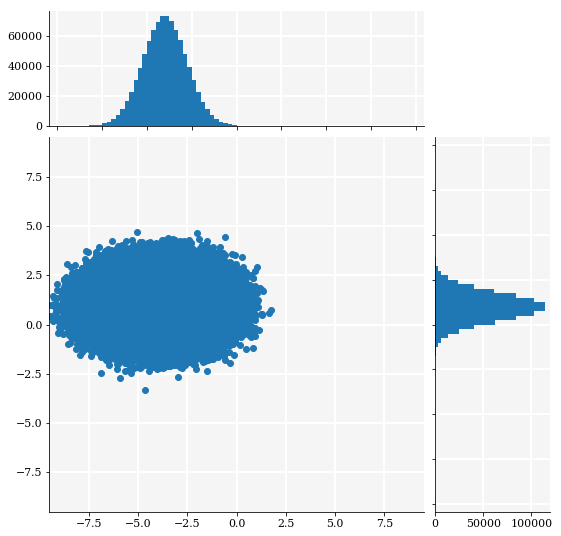

In [31]:
#---------------------------- INDEPENDENT RANDOM VARIABLES ------------------------------#
N = 900000

x1 = np.random.normal(mu1,dev_1,(N,1))
x2 = np.random.normal(mu2,dev_2,(N,1))

nullfmt = NullFormatter()

#axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# rectangular figure

plt.figure(1, figsize=(8,8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

#scatter plot

axScatter.scatter(x1, x2)

# limits

binwidth = 0.25
xymax = np.max([np.max(np.fabs(x1)), np.max(np.fabs(x2)) ])
lim = (int(xymax/binwidth)+1)*binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x1, bins = bins)
axHisty.hist(x2, bins = bins, orientation='horizontal')

#axHistx.set_xlim(axScatter.get_xlim())
#axHistx.set_ylim(axScatter.get_ylim())

plt.show()

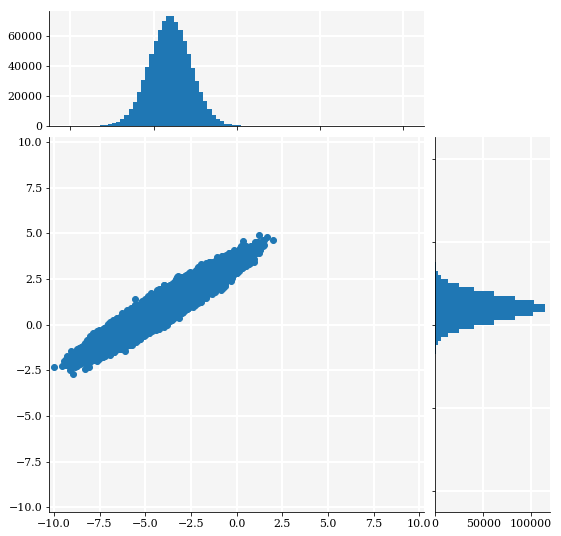

In [28]:
#--------------------------- CORRELATED RANDOM VARIABLES -----------------------------#
N = 900000
xc,yc = np.random.multivariate_normal(mean_a, cov,(N,1)).T
xc = np.transpose(xc)
yc = np.transpose(yc)


nullfmt = NullFormatter()

#axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

## output distribution
zc = evalfunction(np.reshape([xc, yc],(N,2)),blackbox)

plt.figure(1, figsize=(8,8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels

axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

#scatter plot

#axScatter.scatter(xi, yi)
axScatter.scatter(xc,yc)

# limits

binwidth = 0.25
#xymax = np.max([np.max(np.fabs(xi)), np.max(np.fabs(yi)) ])
xymax = np.max([np.max(np.fabs(xc)), np.max(np.fabs(yc)) ])

lim = (int(xymax/binwidth)+1)*binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

#axScatter.set_xlim((-5, 5))
#axScatter.set_ylim((-5, 5))


bins = np.arange(-lim, lim + binwidth, binwidth)
#axHistx.hist(xi, bins = bins)
#axHisty.hist(yi, bins = bins, orientation='horizontal')

axHistx.hist(xc, bins = bins)
axHisty.hist(yc, bins = bins, orientation='horizontal')

#axHistx.set_xlim(axScatter.get_xlim())
#axHistx.set_ylim(axScatter.get_ylim())

plt.show()